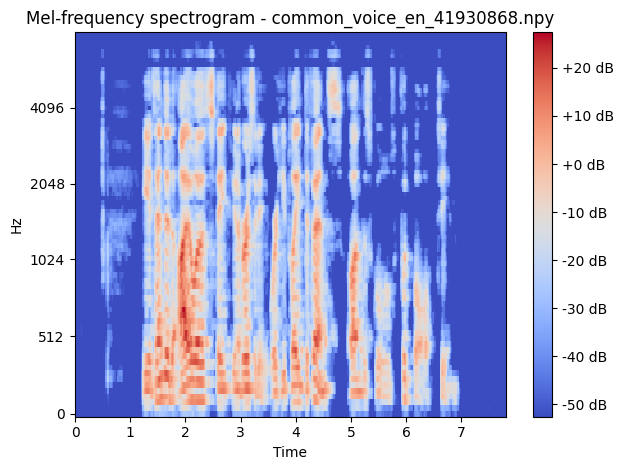

In [1]:
# Display one spectrogram
import numpy as np
import matplotlib.pyplot as plt
import torch
import librosa.display
import os

PROCESSED_DIR = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/data/processed/mini_cv"

npy_file = [file for file in os.listdir(PROCESSED_DIR) if file.endswith('.npy')][0]

spect_path = os.path.join(PROCESSED_DIR, npy_file)
S_dB = np.load(spect_path)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=22050, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title=f"Mel-frequency spectrogram - {npy_file}")
plt.tight_layout()
plt.show()

In [2]:
# Run a forward pass
import importlib.util
import sys
import torch
import os
from torch.utils.data import DataLoader

neural_file_path = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/"
datasets_file = os.path.join(neural_file_path, "datasets.py")
wrap_file = os.path.join(neural_file_path, "wrap_encoder.py")
cnn_file = os.path.join(neural_file_path, "cnn_encoder.py")

dataset_spec = importlib.util.spec_from_file_location("datasets", datasets_file)
datasets = importlib.util.module_from_spec(dataset_spec)
sys.modules["datasets"] = datasets
dataset_spec.loader.exec_module(datasets)
wrap_spec = importlib.util.spec_from_file_location("wrap_encoder", wrap_file)
wrap_encoder = importlib.util.module_from_spec(wrap_spec)
sys.modules["wrap_encoder"] = wrap_encoder
wrap_spec.loader.exec_module(wrap_encoder)
cnn_spec = importlib.util.spec_from_file_location("cnn_encoder", cnn_file)
cnn_encoder = importlib.util.module_from_spec(cnn_spec)
sys.modules["cnn_encoder"] = cnn_encoder
cnn_spec.loader.exec_module(cnn_encoder)

manifest_path = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/data/manifest.csv"
spect_dir = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/data/processed/mini_cv"
dataset = datasets.MiniCVDataset(manifest_path, spect_dir)
loader = DataLoader(dataset, batch_size=1, collate_fn=datasets.collate_fn)

spect, target = next(iter(loader))
print(f"Spectogram shape: {spect.shape}")

model = wrap_encoder.WrapEncoder(cnn_encoder.CNNEncoder())
model.eval()

with torch.no_grad():
    output = model(spect)
print(f"Output shape: {output.shape}")

2025-06-10 11:57:24.634 | INFO     | neural_networks.config:<module>:14 - PROJ_ROOT path is: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


Spectogram shape: torch.Size([1, 1, 80, 359])
Output shape: torch.Size([1, 10])


In [3]:
# Shell-launch training
import subprocess
import os
proj_root = "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr"
train_script = os.path.join(proj_root, "neural_networks/modeling/train.py")
env = os.environ.copy()
env["PYTHONPATH"] = proj_root

print("Running with PYTHONPATH:", env["PYTHONPATH"])

subprocess.run(["python", train_script, "--model_type", "cnn", "--epochs", "3"], env=env, cwd=proj_root)

subprocess.run(["python", train_script, "--model_type", "rnn", "--epochs", "3"], env=env, cwd=proj_root)


Running with PYTHONPATH: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


2025-06-10 11:57:29.566 | INFO     | neural_networks.config:<module>:14 - PROJ_ROOT path is: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


Train Epoch: 1 [0/60 (0%)]      Loss: 2.235511━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:02

 Epoch 1 completed
Train loss: 3.0315
Val loss: 4.1092
Val accuracy: 0.0500
Train Epoch: 2 [0/60 (0%)]      Loss: 2.657576━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 2... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 2 completed
Train loss: 2.5608
Val loss: 2.3567
Val accuracy: 0.1500
Train Epoch: 3 [0/60 (0%)]      Loss: 2.374617━━━━━━━━━━━━━━━━━━━   0% -:--:--
Epoch 3... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01

 Epoch 3 completed
Train loss: 2.4762
Val loss: 2.5279
Val accuracy: 0.1500


Usage: train.py [OPTIONS]
Try 'train.py --help' for help.
╭─ Error ──────────────────────────────────────────────────────────────────────╮
│ No such option: --model_type Did you mean --model-type?                      │
╰──────────────────────────────────────────────────────────────────────────────╯
2025-06-10 11:58:10.771 | INFO     | neural_networks.config:<module>:14 - PROJ_ROOT path is: /Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr


Epoch 1... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


Traceback (most recent call last):
  File "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/modeling/train.py", line 168, in <module>
    main(check_data=args.check_data, model_type=args.model_type, epochs=args.epochs)
  File "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/modeling/train.py", line 151, in main
    train_loss = train(model, train_loader, optimizer, criterion, device, epoch, log_interval=20)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/modeling/train.py", line 54, in train
    outputs = model(spects)
              ^^^^^^^^^^^^^
  File "/opt/miniconda3/envs/Common-voice-asr/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1751, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

CompletedProcess(args=['python', '/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/modeling/train.py', '--model_type', 'rnn', '--epochs', '3'], returncode=1)

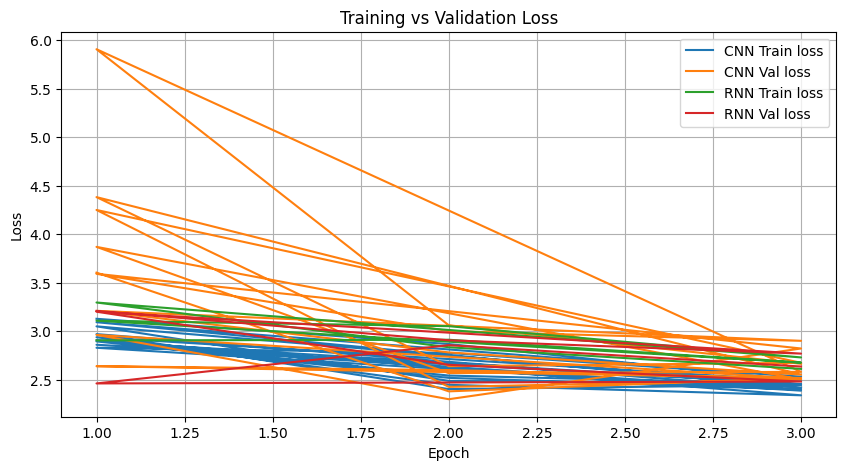

In [4]:
# Plot logged loss curves
import matplotlib.pyplot as plt
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def plot_loss_curves(log_dir, label_pref=""):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    train_losses = event_acc.Scalars("Loss/train")
    val_losses = event_acc.Scalars("Loss/val")

    train_steps = [x.step for x in train_losses]
    train_vals = [x.value for x in train_losses]
    val_steps = [x.step for x in val_losses]
    val_vals = [x.value for x in val_losses]

    plt.plot(train_steps, train_vals, label=f"{label_pref}Train loss")
    plt.plot(val_steps, val_vals, label=f"{label_pref}Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(10,5))
plot_loss_curves("/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/runs/week3_cnn", "CNN ")
plot_loss_curves("/Users/setongerrity/Desktop/Mozilla/common-voice-asr/Common-voice-asr/neural_networks/runs/week3_rnn", "RNN ")
plt.title("Training vs Validation Loss")
plt.show()